**Introduction** **to** **the** **dataset** 😁😎

The **Adult** **dataset** is a widely used standard machine learning dataset, used to explore and demonstrate many machine learning algorithms, both generally and those designed specifically for imbalanced classification.Many binary classification tasks do not have an equal number of examples from each class, i.e. the class distribution is skewed or imbalanced. 

This dataset forms a clear example that involves **predicting** **personal** **income** **levels** **as** **above** **or** **below** **50,000 USD** per year based on personal details such as relationship and education level. There are many more cases of incomes less than **50K USD** than above **50K USD**, although the skew is not severe.


So the classification type algorithm may be applied over the model and the model performance can be reported by the classification metrics and accuracy.

**Objectives** **&** **Workflow** 😊😊

1. Load & Explore the dataset, generate ideas for data preparation and model selection
2. Systematically evaluate a suite machine models 
3. Fit a final model and use to predict class labels & predict personal income levels below or above 50k USD.

The dataset is credited to Ronny Kohavi and Barry Becker and was drawn from the 1994 United States Census Bureau data and involves using personal details such as education level to predict whether an individual will earn more or less than $50,000 per year.

The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc..

The dataset provides 14 input variables that are a mixture of categorical, ordinal, and numerical data types.

**Getting** **started** **with** **the** **dataset** 🤠👓👓⏳

In [2]:
#Importing required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SANDHYA\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading** **the** **dataset** 💻💾

In [4]:
data=pd.read_csv("adult.csv")
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**Info** **about** **the** **data** 😎👓

In [5]:
#Shape of the data
 
data.shape

(48842, 15)

The dataset contains 48842 rows and 15 columns.

In [6]:
# Information regarding the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


We can see that the input variables are a mixture of numerical and categorical or ordinal data types, where the non-numerical columns are represented using strings. At a minimum, the categorical variables will need to be ordinal or one-hot encoded.

We can also see that the target variable is represented using strings. This column will need to be label encoded with 0 for the majority class and 1 for the minority class, as is the custom for binary imbalanced classification tasks.

In [9]:
# Statistical description of the data

data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


This describes the statistical description of numerical columns in the data. If "include = all" is given, it gives the characteristics of every variable irrelevant of numerical or categorical.

From the above statistical description, there appears a clue of outliers in the data for the columns "Capital- gain" & "Capital - loss". This will be explored further and the conclusions are derived in the next steps.

**Exploration** **of** **data**

In [35]:
# Search for missing values

data.apply(lambda x:x=="?",axis=0).sum()

C:\Users\SANDHYA\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


age                   0
workclass          2364
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2373
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      708
income                0
dtype: int64

Hence, there exists missing values in the data. Since only around 5% of the data, contains the missing values, it is not a good practise to drop the values/entries. Hence, we take the method of imputation.

In [39]:
data['workclass'].value_counts()

Private             28464
Self-emp-not-inc     3116
Local-gov            2582
?                    2364
State-gov            1671
Self-emp-inc         1207
Federal-gov          1131
Without-pay            18
Never-worked            9
Name: workclass, dtype: int64

In [40]:
data['native-country'].value_counts()

United-States                 36417
Mexico                          731
?                               708
Philippines                     258
Germany                         170
Puerto-Rico                     161
Canada                          146
India                           124
Cuba                            123
El-Salvador                     122
China                           102
England                         101
Jamaica                          98
South                            96
Dominican-Republic               95
Italy                            90
Columbia                         76
Poland                           75
Japan                            74
Vietnam                          73
Haiti                            70
Guatemala                        67
Portugal                         60
Taiwan                           54
Iran                             48
Ecuador                          42
Nicaragua                        39
Greece                      

In [41]:
data['occupation'].value_counts()

Craft-repair         5108
Adm-clerical         4845
Prof-specialty       4725
Exec-managerial      4626
Sales                4539
Other-service        4412
Machine-op-inspct    2620
?                    2373
Transport-moving     2000
Handlers-cleaners    1807
Farming-fishing      1258
Tech-support         1187
Protective-serv       835
Priv-house-serv       214
Armed-Forces           13
Name: occupation, dtype: int64

In [52]:
data['workclass'] = data['workclass'].replace('?', np.NaN)
data['occupation'] = data['occupation'].replace('?', np.NaN)
data['native-country'] = data['native-country'].replace('?', np.NaN)

In [53]:
data['workclass']=data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation']=data['occupation'].fillna(data['occupation'].mode()[0])
data['native-country']=data['native-country'].fillna(data['native-country'].mode()[0])

In [43]:
inc = {'<=50K':0, '>50K':1}
data["income"].replace(inc, inplace=True)

In [46]:
# list of numerical variables
num_feat = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(num_feat))
data[num_feat].head(3)

Number of numerical variables:  7


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1


In [47]:
# list of Catagorical variables
cat_feat = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('Number of catagorical variables: ', len(cat_feat))
data[cat_feat].head(3)

Number of catagorical variables:  8


,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States


C:\Users\SANDHYA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\SANDHYA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


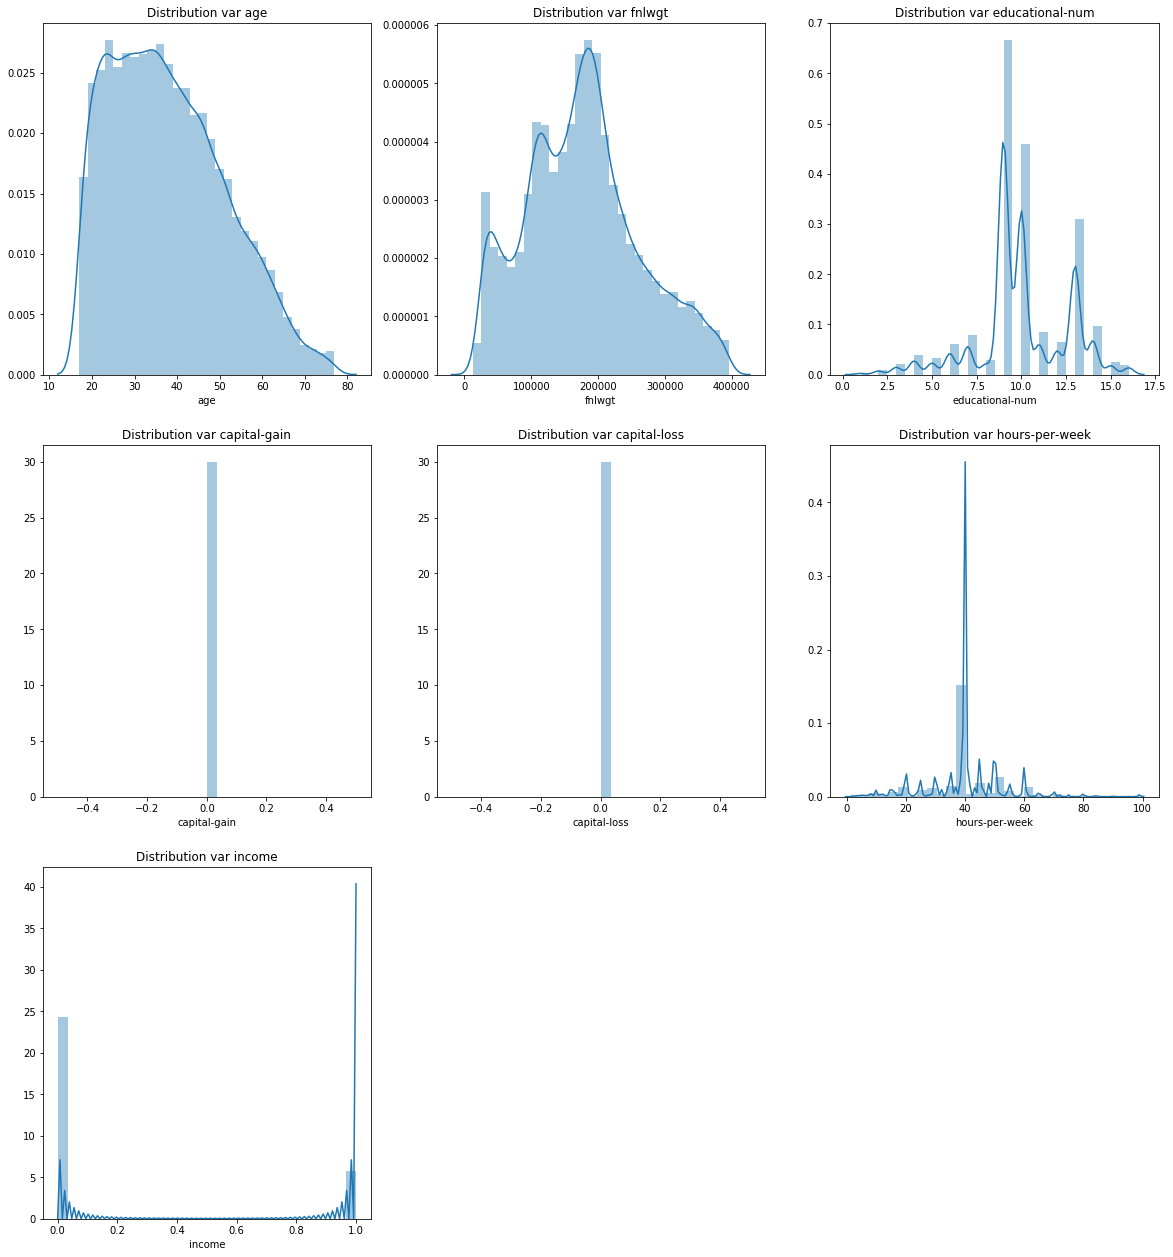

In [48]:
plt.figure(figsize=(20,22))
n = 0
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=10)
for i, column in enumerate(data[num_feat].columns):
    n+=1
    plt.subplot(3, 3, n)
    sns.distplot(data[num_feat][column], bins=30)
    plt.title('Distribution var {}'.format(column))
plt.show()



**Handling** **Outliers**

From the statistical study, it is found that may be present of outliers. This can be confirmed by the following graphs.

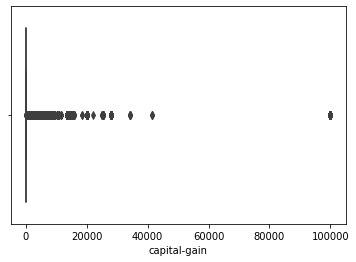

In [12]:
sns.boxplot(data['capital-gain'])

There exists outliers in the column of 'capital gain' & it can be visually seen.

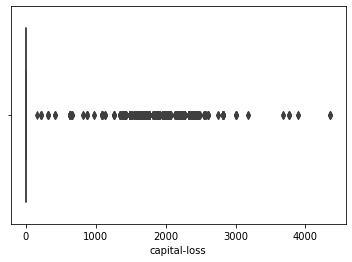

In [13]:
sns.boxplot(data['capital-loss'])

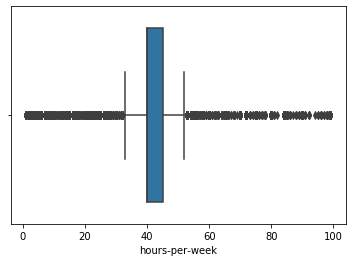

In [49]:
sns.boxplot(data['hours-per-week'])

Most of the data is distributed between 1000USD and 3000 USD out of which the others may be spread evenly in the case of **capital** **loss**.

In [22]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(data['age'])

Outliers: [80, 90, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 81, 80, 88, 87, 90, 83, 80, 90, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 81, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 81, 80, 83, 90, 90, 81, 90, 90, 80, 90, 90, 84, 90, 80, 90, 81, 83, 84, 81, 85, 82, 80, 90, 90, 90, 84, 80, 90, 90, 84, 90, 90, 90, 90, 82, 81, 90, 84, 81, 82, 81, 80, 90, 80, 84, 82, 90, 84, 90, 83, 81, 80, 80, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 80, 82, 85, 80, 90, 81, 80, 81, 82, 88, 90, 82, 88, 84, 83, 86, 90, 90, 82, 83, 81, 90, 80, 81, 84, 84, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]


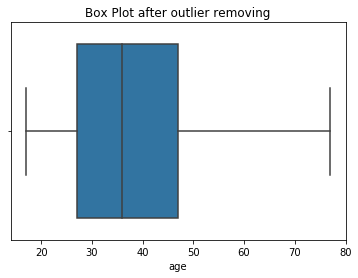

In [28]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(data, 'age')
sns.boxplot(data['age'])
plt.title("Box Plot after outlier removing")
plt.show()

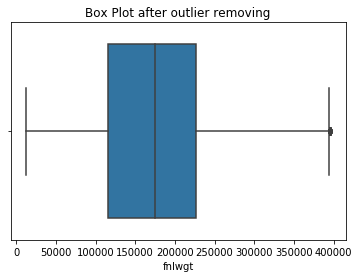

In [30]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(data, 'fnlwgt')
sns.boxplot(data['fnlwgt'])
plt.title("Box Plot after outlier removing")
plt.show()

**Correlation** **between** **the** **columns**

In [54]:
data.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.061761,0.012360,NaN,NaN,0.095204,0.217496
fnlwgt,-0.061761,1.000000,-0.029847,NaN,NaN,-0.015005,0.000392
educational-num,0.012360,-0.029847,1.000000,NaN,NaN,0.124552,0.291074
capital-gain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,0.095204,-0.015005,0.124552,NaN,NaN,1.000000,0.205378
income,0.217496,0.000392,0.291074,NaN,NaN,0.205378,1.000000


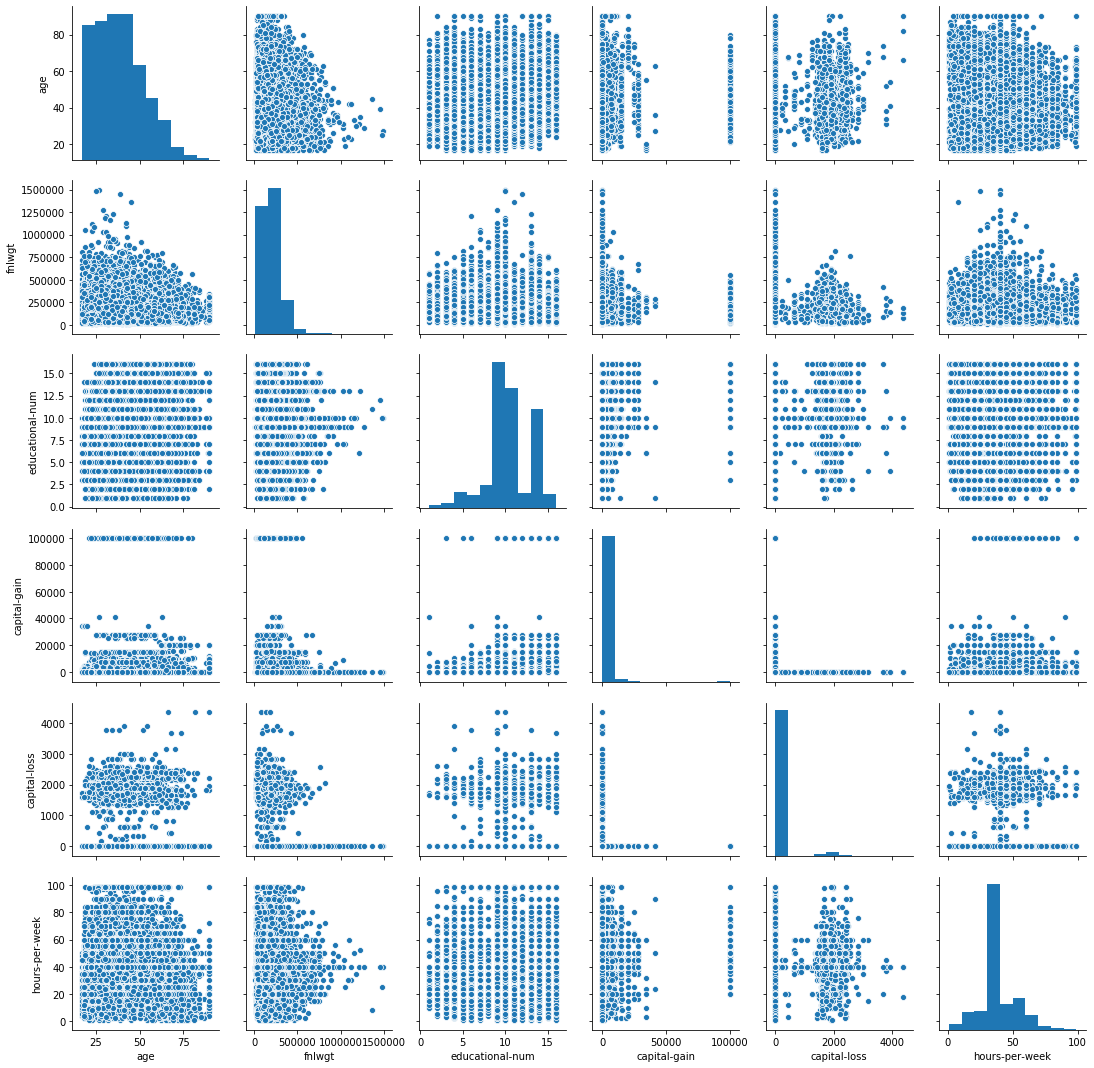

In [21]:
sns.pairplot(data)

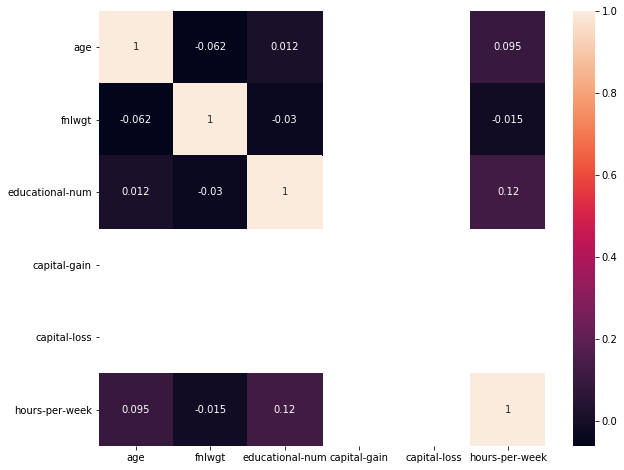

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot = True)

There are no much correlated variables in the data as per the above visualisation

In [55]:
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Craft-repair,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


**Drop** **Columns**

In order to proceed further, we need to drop some columns that have not much influence over the data. So, we can drop columns like "fnlwgt","capital-gain","capital-loss" columns.

In [56]:
data_ = data.drop(['fnlwgt','capital-loss','capital-gain'],axis=1)
data_.head(5)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
4,18,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Female,30,United-States,0
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0


In [57]:
data_.shape # Formatted shape of the data

(40562, 12)

**EDA** - Lets play with variables!! 😎😉🤗 & derive some conclusions from the visualisations ...

In [60]:
data_.groupby('gender')['hours-per-week'].sum()

gender
Female     511797
Male      1113346
Name: hours-per-week, dtype: int64

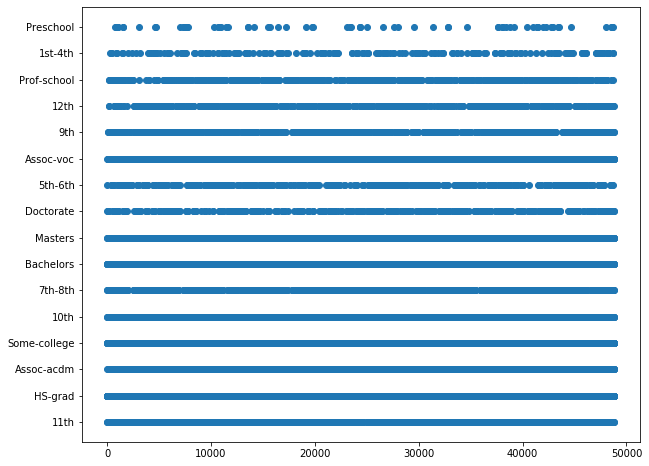

In [61]:
plt.figure(figsize=(10,8))
plt.scatter(data_.index,data_['education'])

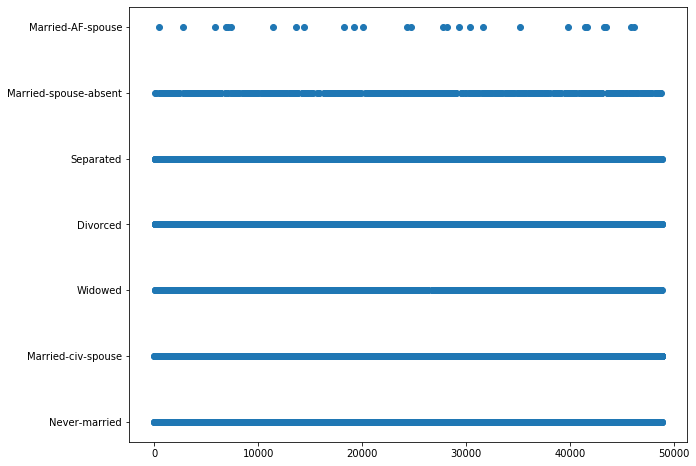

In [62]:
plt.figure(figsize=(10,8))
plt.scatter(data_.index,data_['marital-status'])

(array([  941.,  2896.,  2988., 22453.,  3754.,  4533.,  2041.,   530.,
          259.,   167.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

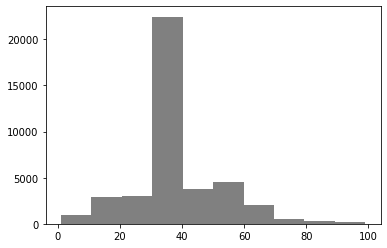

In [63]:
plt.hist(data['hours-per-week'],color='grey')

(array([  268.,   418.,  1441.,  1221.,  2183., 13530., 11029.,  1337.,
         8239.,   896.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

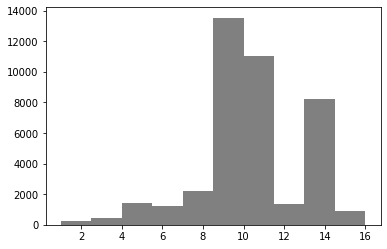

In [64]:
plt.hist(data['educational-num'],color='grey')

(array([32821.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7741.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

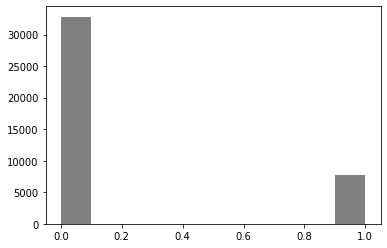

In [66]:
plt.hist(data['income'],color='grey')

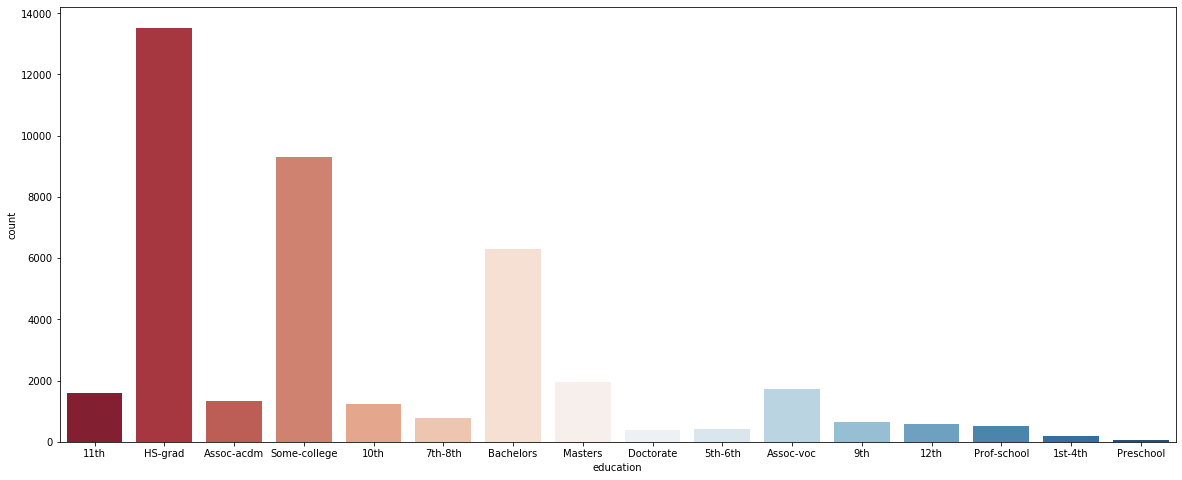

In [70]:
plt.figure(figsize=(20,8))
sns.countplot(x='education',data=data_,palette='RdBu')

**Bi-Variate** **Analysis**

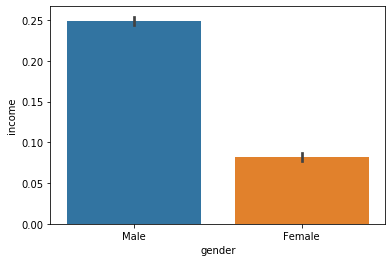

In [73]:
sns.barplot(x='gender',y='income',data=data_)

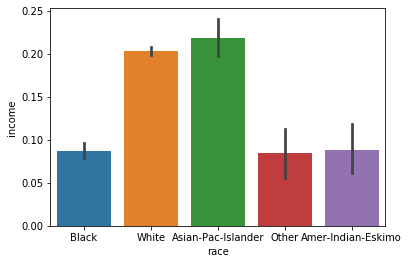

In [74]:
sns.barplot(x='race',y='income',data=data_)

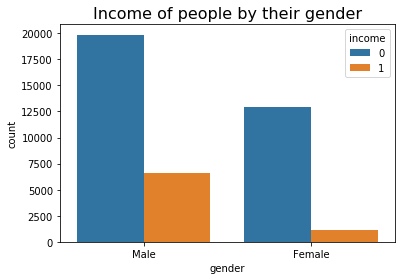

In [83]:
plt.title("Income of people by their gender", fontsize = 16)
sns.countplot(x = data['gender'], hue = data['income'])
plt.show()

**Handling** **Categorical** **Values**

In [80]:
data_.head(2)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0


In [81]:
data_['workclass'].unique()

array(['Private', 'Local-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'State-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [82]:
data_['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', '7th-8th',
       'Bachelors', 'Masters', 'Doctorate', '5th-6th', 'Assoc-voc', '9th',
       '12th', 'Prof-school', '1st-4th', 'Preschool'], dtype=object)

In [84]:
data_['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [85]:
data_['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Craft-repair', 'Other-service', 'Adm-clerical', 'Exec-managerial',
       'Prof-specialty', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Handlers-cleaners', 'Transport-moving', 'Armed-Forces'],
      dtype=object)

In [86]:
data_['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [87]:
data_['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [88]:
data_['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [89]:
data_['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'South',
       'Columbia', 'Japan', 'India', 'Cambodia', 'Poland', 'Laos',
       'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Vietnam', 'Iran', 'Scotland', 'Jamaica',
       'Honduras', 'Ecuador', 'Greece', 'Hungary', 'Trinadad&Tobago',
       'Outlying-US(Guam-USVI-etc)', 'Hong', 'Yugoslavia', 'France'],
      dtype=object)

In [90]:
data1=pd.get_dummies(data=data_,columns=['gender','race','workclass', 'education', 'marital-status','occupation','relationship'])
data1.head(5)

,age,educational-num,hours-per-week,native-country,income,gender_Female,gender_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,40,United-States,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9,50,United-States,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,28,12,40,United-States,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,18,10,30,United-States,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,30,United-States,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [92]:
data1.shape 

(40562, 63)

After all the transformations done over the dataset, it have 40562 rows and 63 columns.

**Processing** - **Train** **the** **model**

In [93]:
# Splitting the data into inputs to be taken and target to be achieved

targets = data1['income']
inputs = data1.drop(['income','native-country'],axis=1)

In [94]:
#Importing the required libraries

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

Classification is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain. An easy to understand example is classifying emails as “spam” or “not spam.”

In [95]:
# Train the data using machine learning model - Decision tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1234)#max_depth = 8, min_samples_leaf=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [96]:
# Predictions arrived after training the model

pred_tree=dt.predict(X_test)
pred_tree

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [97]:
#metrics

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_tree)

0.8115370393196105

In [98]:
#Comparing actual vs predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_tree})  
df

,Actual,Predicted
39843,1,1
8454,0,0
7687,0,0
36144,0,0
16784,0,0
...,...,...
19403,1,0
45658,0,0
6613,0,0
6484,0,1


In [99]:
#Compare our decision tree to a logistic regression

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state = 10)
logreg.fit(X_train, y_train)
pred_logit = logreg.predict(X_test)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(y_test, pred_tree)
class_rep_log = classification_report(y_test, pred_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Decision Tree: 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      6590
           1       0.50      0.48      0.49      1523

    accuracy                           0.81      8113
   macro avg       0.69      0.69      0.69      8113
weighted avg       0.81      0.81      0.81      8113

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      6590
           1       0.64      0.47      0.54      1523

    accuracy                           0.85      8113
   macro avg       0.76      0.70      0.73      8113
weighted avg       0.84      0.85      0.84      8113



In [100]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
pred_random = classifier.predict(X_test)
pred_random

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [102]:
class_rep_random = classification_report(y_test, pred_random)

print("Random Forest: \n", class_rep_random)

Random Forest: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      6590
           1       0.58      0.49      0.53      1523

    accuracy                           0.84      8113
   macro avg       0.74      0.70      0.72      8113
weighted avg       0.83      0.84      0.83      8113



After applying the Random forest algorithm, the accuracy increased to 84%. Now we apply Gradient Boosting Algorithm to see whether the accuracy is increased further.

In [103]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier

In [104]:
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [105]:
# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [106]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               return_train_score=True,
                               verbose = 1)

grid_search_GBC.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  4.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=2,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=200,
                                                  n_iter_no_change=None,
                                                  presort=

In [107]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.890096,0.184965,0.063148,0.002333,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.859850,0.855875,0.856403,0.857376,0.001763,3,0.861918,0.862888,0.864565,0.863124,0.001094
1,11.563609,0.095171,0.065308,0.004223,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.859758,0.858648,0.856773,0.858393,0.001232,2,0.863119,0.863952,0.865536,0.864202,0.001002
2,9.653504,0.132070,0.069526,0.008867,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.862901,0.858371,0.854924,0.858732,0.003267,1,0.862796,0.864553,0.865305,0.864218,0.001051
3,8.578368,0.211708,0.057212,0.002692,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.853749,0.853749,0.853259,0.853586,0.000231,7,0.860161,0.862426,0.860128,0.860905,0.001076
4,11.263565,0.468005,0.054545,0.009327,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.855413,0.855598,0.854276,0.855096,0.000584,6,0.867003,0.864090,0.868864,0.866652,0.001964


In [108]:
y_pred_GBC=grid_search_GBC.predict(X_test)

In [109]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_GBC})  
df

,Actual,Predicted
39843,1,1
8454,0,0
7687,0,0
36144,0,0
16784,0,0
...,...,...
19403,1,0
45658,0,0
6613,0,0
6484,0,1


In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_GBC)

0.8566498212744977

Hence, we applied 4 machine learning models to train the data. The models applied & the accuracies obtained on a brief were given as:

Logistic Regression - 85%

Decision Tree - 81%

Random Forest - 84 %

Gradient Boosting - 86 %

Out of the four machine learning models applied, "Gradient Boosting" has given me the highest accuracy. So, importing the original test data and applying the Gradient Boosting Classifier will provide me the required lead prediction for the credit card.